In [30]:
import os
import os.path as osp
import numpy as np
import pickle
import matplotlib.pyplot as plt
import numpy.linalg as LA
import torch


class VFunc:
    def __init__(self):  
        self.policy = torch.load("saved_model/policy_drone_xz_LBAC_epi10000_seed1.pkl")
        self.critic = torch.load("saved_model/critic_drone_xz_LBAC_epi10000_seed1.pkl")
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
    def compute_v(self, state_array):
        state = torch.FloatTensor(state_array).to(self.device).unsqueeze(0)
        action, _, _ = self.policy.sample(state)
        # state = torch.unsqueeze(state, dim=0)
        # action = torch.unsqueeze(action, dim=0)
        v = self.critic(state, action)
        v_val = min(v[0].item(), v[1].item())
        return v_val
    
v_func = VFunc()
v_func.compute_v(np.array([0, 0, 0, 0]))

-1321.920166015625

In [31]:
unit_num = 40
nx, ny = (3 * unit_num, 2 * unit_num)
xs = np.linspace(-2, 1, nx)
ys = np.linspace(0, 2, ny)

zs = np.zeros((ny, nx))

for num_x in range(xs.shape[0]):
    for num_y in range(ys.shape[0]):
        zs[ny - 1 - num_y, num_x] = v_func.compute_v(np.array([xs[num_x], ys[num_y], 1, 0]))

/home/desong/anaconda3/envs/drones_py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


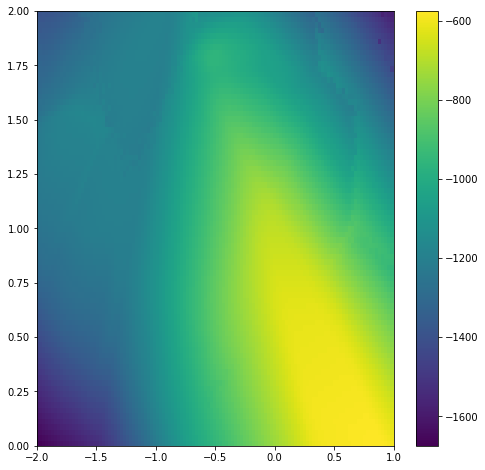

In [32]:
fig, axs = plt.subplots(1, figsize=(8, 8))
rectangle_lower = plt.Rectangle((-1, 0.1), 0.5, 0.9, color='red', alpha=0.2)
rectangle_higher = plt.Rectangle((0, 1.3), 1, 0.5, color='red', alpha=0.2)
ground = plt.Rectangle((-2, 0), 3, 0.2, color='red', alpha=0.2)
plt.pcolormesh(xs, ys, zs)
plt.colorbar()
# plt.gca().add_patch(rectangle_lower, )
# plt.gca().add_patch(rectangle_higher)
# plt.gca().add_patch(ground)
plt.show()